In [339]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.special import legendre
from scipy.special import hermite
import copy
import pandas as pd
from scipy import integrate
from scipy.special import comb
from scipy import integrate

In [ ]:
'''
https://people.sc.fsu.edu/~jburkardt/py_src/monomial/monomial.py
Finds the next monomial multi-index, as explained in the lecture

'''

def next_monomial(m,x):
    j = 0

    for i in range ( 1, m ):
        if ( 0 < x[i] ):
            j = i
            break

    if ( j == 0 ):
        t = x[0]
        x[0] = 0
        x[m-1] = t + 1
    elif ( j < m - 1 ):
        x[j] = x[j] - 1
        t = x[0] + 1;
        x[0] = 0;
        x[j-1] = x[j-1] + t
    elif ( j == m - 1 ):
        t = x[0]
        x[0] = 0
        x[j-1] = t + 1
        x[j] = x[j] - 1

    return x

In [516]:
def f(z1, z2):
    return -abs(z1)**3*z2+np.exp(-(z1-0.5)**2-0.25*z2**2)

In [200]:
M = 1000000
Z = np.zeros((M,2))

Z[:,0] = np.random.uniform(size=M) * 2 - 1
Z[:,1] = np.random.uniform(size=M) * 2 - 1

f_real = f(Z[:,0],Z[:,1])

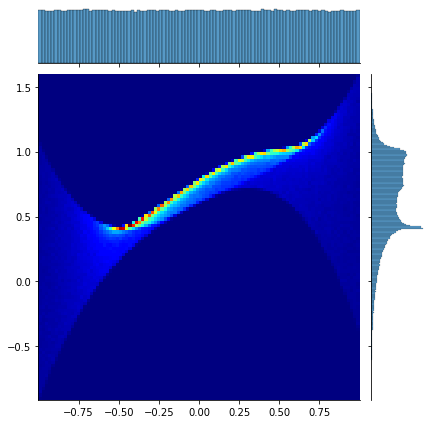

In [204]:
x = Z[:,0]
y = f_real

ax1 = sns.jointplot(x=x, y=y)
ax1.ax_joint.cla()
plt.sca(ax1.ax_joint)

plt.hist2d(x, y, bins=(100, 100), cmap=cm.jet);

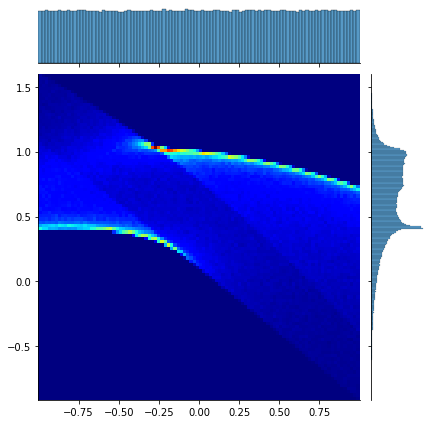

In [205]:
x = Z[:,1]
y = f_real

ax1 = sns.jointplot(x=x, y=y)
ax1.ax_joint.cla()
plt.sca(ax1.ax_joint)

plt.hist2d(x, y, bins=(100, 100), cmap=cm.jet);

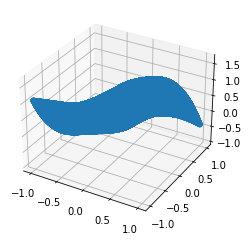

In [206]:
ax = plt.axes(projection='3d')
ax.scatter3D(Z[:,0], Z[:,1], f_real)

In [538]:
N = 2
M = N+1
D=2

In [539]:
x, w = np.polynomial.legendre.leggauss(M)

#x: sample points
#w: weights

In [540]:
c=np.zeros(N+1); g=np.zeros(N+1);

In [541]:
# computational grid
l =-1
r=1
dz=0.001;

z=np.linspace(l,r,int((r-l) / dz));
J=len(z)-1;
p1=np.zeros((N+1,J+1)); 
p2=np.zeros((N+1,J+1)); 

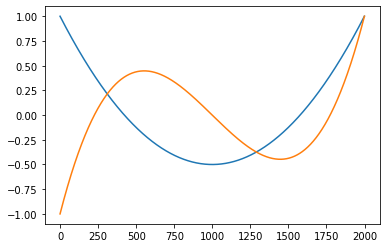

In [542]:
# nice legendre poly's
i=4

plt.plot(legendre(i-2)(z))
plt.plot(legendre(i-1)(z))

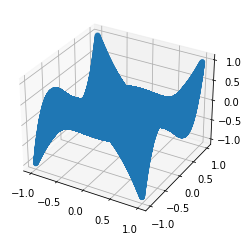

In [543]:
ax = plt.axes(projection='3d')
ax.scatter3D(Z[:,0], Z[:,1], legendre(i-2)(Z[:,0]) * legendre(i-1)(Z[:,1]))

In [544]:
# build monomial multi indices
monomial={}
x=np.array([0,0])
D = 2
set_size = int(comb(N+D,N))

for i in range(set_size):
    monomial[i] = x.copy()
    x = next_monomial(D,x)

In [545]:
monomial

{0: array([0, 0]),
 1: array([0, 1]),
 2: array([1, 0]),
 3: array([0, 2]),
 4: array([1, 1]),
 5: array([2, 0])}

In [319]:
# finding gamma

In [552]:
# numerical solution in 1D
i=3

f_gamma = lambda x, i: legendre(i-1)(x)* legendre(i-1)(x) 

integrate.quadrature(f_gamma, -1,1, args=(i))[0]

0.3999999999999999

In [553]:
# analytical solution in 1 D
2/(2*i-1)

0.4

In [554]:
# function to get the multi index gamma from a multi index
def get_gamma(multi_index):
    gammas = np.zeros(len(monomial[multi_index]))
    for index, i in enumerate(monomial[multi_index]):
        gammas[index] = integrate.quad(f_gamma, -1,1, args=(i+1))[0]
    return np.product(gammas)

In [560]:
get_gamma(4)

0.44444444444444486

In [563]:
# get the f_hat

f_hats = np.zeros(len(monomial))
psy = np.zeros(len(monomial))

for multi_index in monomial.keys():
    f_hats[multi_index] = np.dot(f(Z[:,0], Z[:,1]),legendre(monomial[multi_index][0])(Z[:,0]) * legendre(monomial[multi_index][1])(Z[:,1]))/len(Z[:,0]) / get_gamma(multi_index)
    psy[multi_index] = legendre(monomial[multi_index][0])(Z[:,0]) * legendre(monomial[multi_index][1])(Z[:,1])

ValueError: setting an array element with a sequence.

In [527]:
f_hats * 

array([ 0.15197591, -0.06223162,  0.11117258, -0.02497633,  0.00087642,
       -0.05366441])

In [519]:
#estimate f_hat
x, w = np.polynomial.legendre.leggauss(M)

for 